In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# k-최근접 이웃

#### 1. 가장 가까운 k개의 이웃을 탐색한다.
#### 2. 탐색된 이웃들 중 가장 많은 레이블을 예측 결과로 제시한다.

In [2]:
X,y = mglearn.datasets.make_forge()

print(f"X shape : {X.shape}\ny shape : {y.shape}")

X shape : (26, 2)
y shape : (26,)


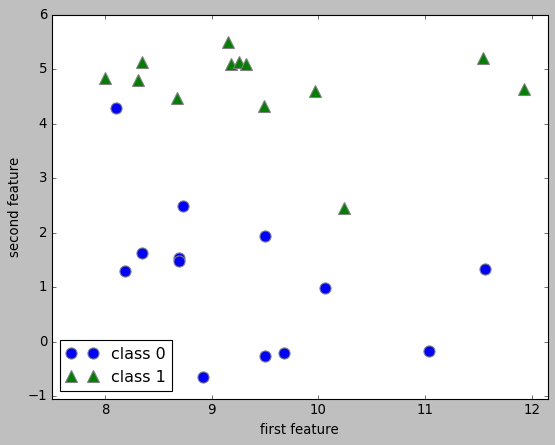

In [3]:
mglearn.discrete_scatter(X[:,0], X[:,1],y, markeredgewidth=1)
plt.legend(['class 0', 'class 1'], loc = 'best')
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

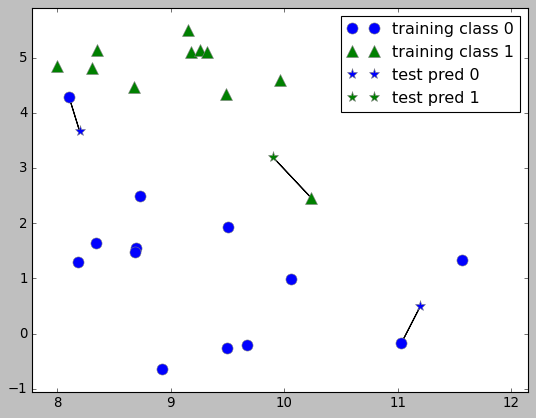

In [4]:
# knn 알고리즘이 어떻게 동작했는지 시각적으로 보여준다.

# 이웃이 1개 일때
mglearn.plots.plot_knn_classification(n_neighbors=1)

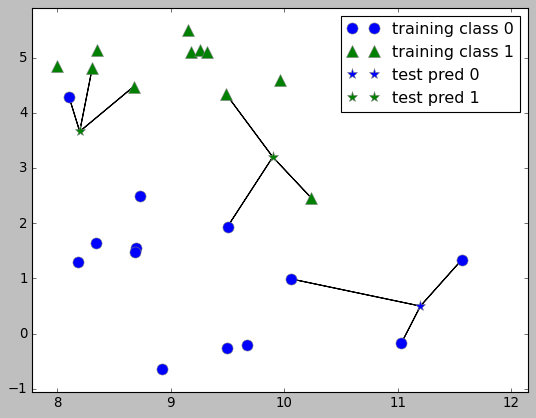

In [5]:
# 이웃이 3개 일 때
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

print(f"train score : {clf.score(X_train, y_train):0.4f}")
print(f"test score : {clf.score(X_test, y_test):0.4f}")
print("="*30)
print("y_test : \n", y_test)
print("y_predicted : \n", clf.predict(X_test))

train score : 0.9474
test score : 0.8571
y_test : 
 [1 0 1 0 1 1 0]
y_predicted : 
 [1 0 1 0 1 0 0]


#### 이웃이 많아 질수록 복잡도는 낮아지고 일반화는 높아진다.

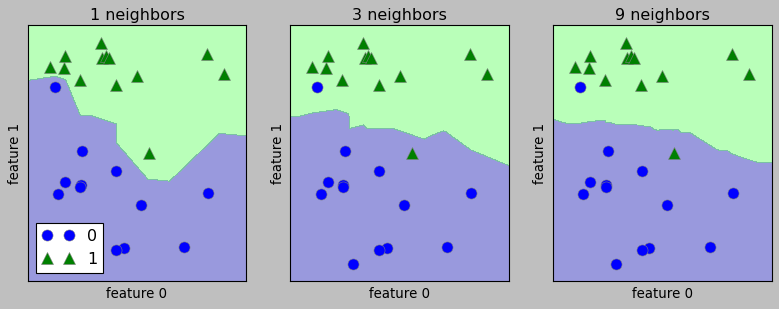

In [7]:
fig, axes = plt.subplots(1,3,figsize = (12,4))

n_neighbors = [1,3,9]
for n, ax in zip(n_neighbors, axes) :
    clf = KNeighborsClassifier(n_neighbors=n).fit(X,y)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax = ax)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4, cm = mglearn.cm3)
    ax.set_title(f"{n} neighbors")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc = 3)

In [8]:
# X,y 의 shape 와 target class 별로 데이터 개수 출력한다. 

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(f"X shape : {cancer.data.shape}\ny shape : {cancer.target.shape}")
print("target :")
cnt = np.bincount(cancer.target)
for i in range(len(cancer.target_names)) :
    print(f"\t{cancer.target_names[i] : <10} => {cnt[i]}")

X shape : (569, 30)
y shape : (569,)
target :
	malignant  => 212
	benign     => 357


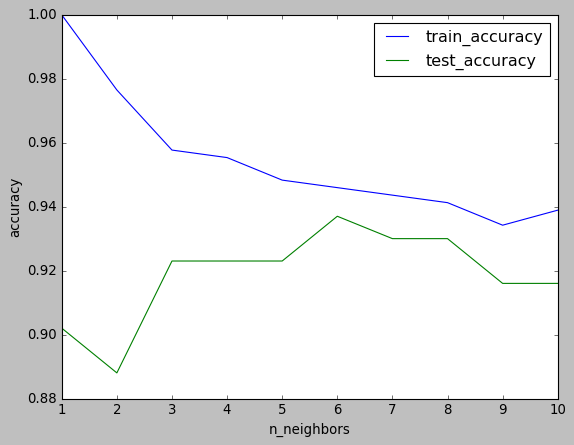

In [9]:


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)

train_accuracy = []
test_accuracy = []

n_neighbors = range(1,11)

for n in n_neighbors :
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors, train_accuracy, label = 'train_accuracy')
plt.plot(n_neighbors, test_accuracy, label = 'test_accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()


# K 최근접 이웃 회귀

#### 1. 가장 가까운 K개의 이웃을 탐색한다.
#### 2. 탐색된 이웃들의 평균을 예측 결과로 제시한다.

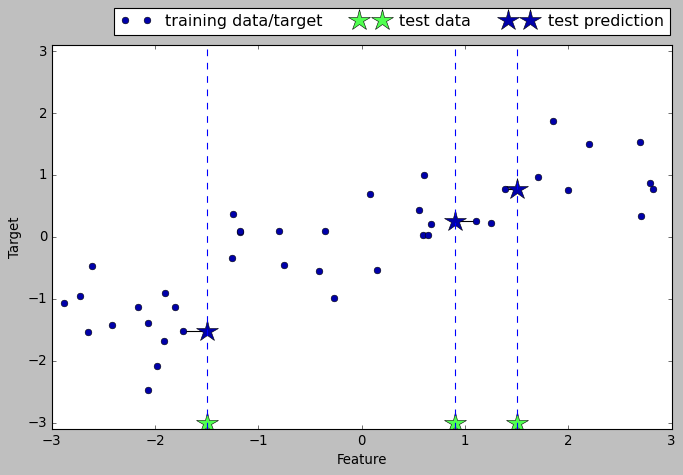

In [10]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

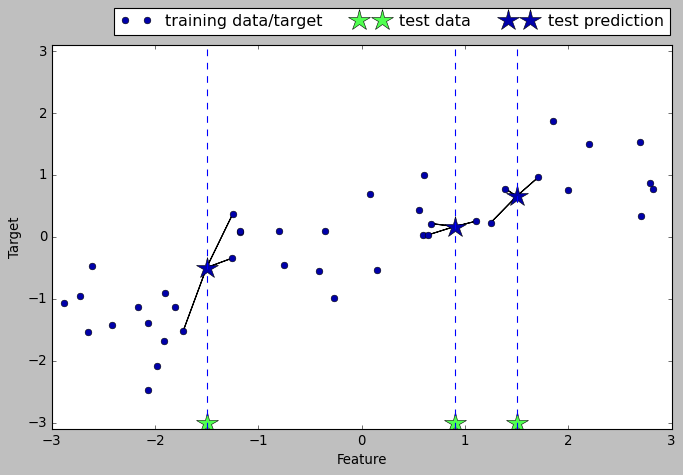

In [11]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [28]:
from sklearn.neighbors import KNeighborsRegressor

X,y = mglearn.datasets.make_wave(n_samples=40)
print(f"X shape : {X.shape}\ny shape : {y.shape}")


X shape : (40, 1)
y shape : (40,)


array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547],
       [-2.87649303],
       [ 2.81945911],
       [ 1.99465584],
       [-1.72596534],
       [-1.9090502 ],
       [-1.89957294],
       [-1.17454654],
       [ 0.14853859],
       [-0.40832989],
       [-1.25262516],
       [ 0.67111737],
       [-2.16303684],
       [-1.24713211],
       [-0.80182894],
       [-0.26358009],
       [ 1.71105577],
       [-1.80195731],
       [ 0.08540663],
       [ 0.55448741],
       [-2.72129752],
       [ 0.64526911],
       [-1.97685526],
       [-2.60969044],
       [ 2.69331322],
       [ 2.7937922 ],
       [ 1.85038409],
       [-1.17231738],
       [-2.41396732],
       [ 1.10539816],
       [-0.35908504]])

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 0)

knn_reg = KNeighborsRegressor(n_neighbors=3).fit(X_train, y_train)

#### knn score은 회귀일 때 결정계수(R^2)를 출력한다.
#### 보통 0~1 사이의 값으로 1이면 완벽한 예측을 말한다. (음수도 가능)
![image](images/R_square.PNG)

In [13]:
print(f"train score : {knn_reg.score(X_train, y_train):0.4f}")
print(f"test score : {knn_reg.score(X_test, y_test):0.4f}")

train score : 0.8194
test score : 0.8344


#### 이웃이 많아 질수록 복잡도는 낮아지고 일반화는 높아진다.

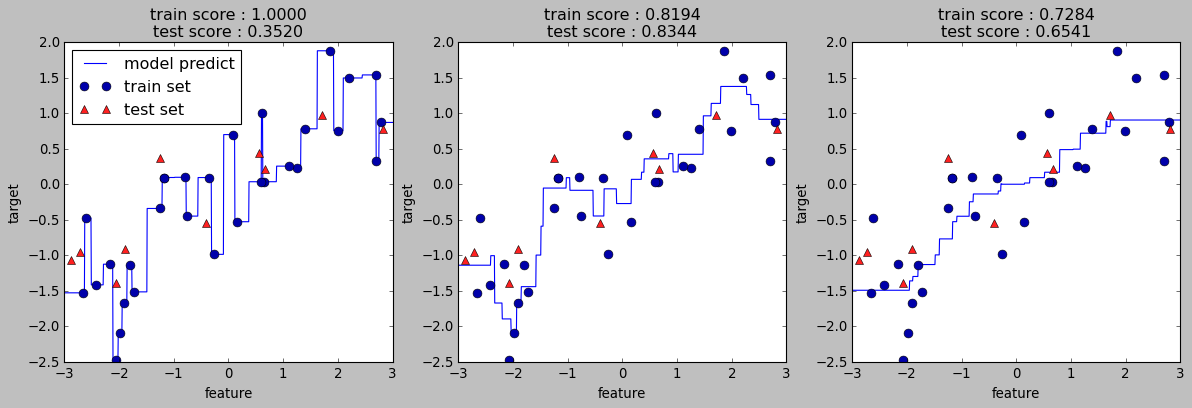

In [31]:
fig, axes = plt.subplots(1,3,figsize=(18,5))

line = np.linspace(-3,3,1000).reshape(-1,1)
n_neighbors = [1,3,9]

for n, ax in zip(n_neighbors, axes) :
    knn_reg = KNeighborsRegressor(n_neighbors=n).fit(X_train, y_train)
    ax.plot(line, knn_reg.predict(line), label = 'model predict')
    ax.plot(X_train, y_train, 'o', c = mglearn.cm2(0), markersize = 8, label = 'train set')
    ax.plot(X_test, y_test, '^', c = mglearn.cm2(1), markersize = 8, label = 'test set')
    ax.set_title(f"train score : {knn_reg.score(X_train, y_train):0.4f}\ntest score : {knn_reg.score(X_test, y_test):0.4f}")
    ax.set_xlabel("feature")
    ax.set_ylabel("target")
    
axes[0].legend(loc = 'best')

## 장점 :
### 이해하기 쉽고 많은 조정이 필요하지 않다.

## 단점 :
### 많은 feature 를 가질 경우 예측이 느려진다.
### 희소 데이터를 가진 경우 잘 동작하지 않는다.


## 유의 사항 :
### 거리를 구하는 알고리즘을 사용하므로 feature 의 scale에 영향을 받는다. 따라서 모든 feature 가 동일한 scale을 가지도록 전처리가 필요하다